In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
cd /content/drive/MyDrive/eeg_dataset

/content/drive/MyDrive/eeg_dataset


In [7]:

!mkdir dataset_2dimages/MDD
!mkdir dataset_2dimages/Control

mkdir: cannot create directory ‘dataset_2dimages/MDD’: File exists


In [8]:
################### convert 1D eeg signal into 2D spectrum for depression classification #####
import os
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import librosa
path="/content/drive/MyDrive/eeg_dataset"  #### you numpy array folder path
control=os.path.join(path,"Control") ##### slect control file path contains control folder
listfile=os.listdir(control)
############ we have 128 channel list, based on our own experinece, we slected these channels
# out of 128 channels
ch=[3,4,9,11,12,22,24,28,33,34,36,37,45,52,58,62,70,75,83,92,94,96,97,104,108,116,117,122,124]
############## save 2D spectrum of eeg signals #####################
save_path="/content/drive/MyDrive/eeg_dataset/dataset_2dimages/Control"
for i in listfile:
    fpath=os.path.join(control,i)
    arrynp=np.load(fpath)
    npfile=arrynp[:128,:]
    for jj in ch:
        signlfile=npfile[jj]
        print(signlfile.shape)
        window_size = 1024
        window = np.hanning(window_size)
        #stft  = librosa.core.spectrum.stft(signlfile, n_fft=window_size, hop_length=512, window=window)
        stft = librosa.stft(signlfile, n_fft=window_size, hop_length=512, window=window)
        out = 2 * np.abs(stft) / np.sum(window)
        # Assuming window_size, hop_length, and window are defined

        from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        ax = fig.add_subplot(111)
        p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max),ax=ax,y_axis='log', x_axis='time')
        fig.savefig(os.path.join(save_path,str(i.split(".")[0])+'_'+str(jj)+'.png'))

(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(75101,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(76039,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75251,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(75138,)
(

In [9]:
import os
import librosa.display
import numpy as np
import librosa
import matplotlib.pyplot as plt
path="/content/drive/MyDrive/eeg_dataset/"
control=os.path.join(path,"MDD")
listfile=os.listdir(control)
save_path="/content/drive/MyDrive/eeg_dataset/dataset_2dimages/MDD"
ch=[3,4,9,11,12,22,24,28,33,34,36,37,45,52,58,62,70,75,83,92,94,96,97,104,108,116,117,122,124]
for i in listfile:
    fpath=os.path.join(control,i)
    arrynp=np.load(fpath)
    npfile=arrynp[:128,:]
    for jj in ch:
        signlfile=npfile[jj]
        #print(signlfile.shape)
        window_size = 1024
        window = np.hanning(window_size)
        stft  = librosa.core.spectrum.stft(signlfile, n_fft=window_size, hop_length=512, window=window)
        out = 2 * np.abs(stft) / np.sum(window)
        from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        ax = fig.add_subplot(111)
        p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max),ax=ax,y_axis='log', x_axis='time')
        fig.savefig(os.path.join(save_path,str(i.split(".")[0])+'_'+str(jj)+'.png'))

(480, 640, 3)


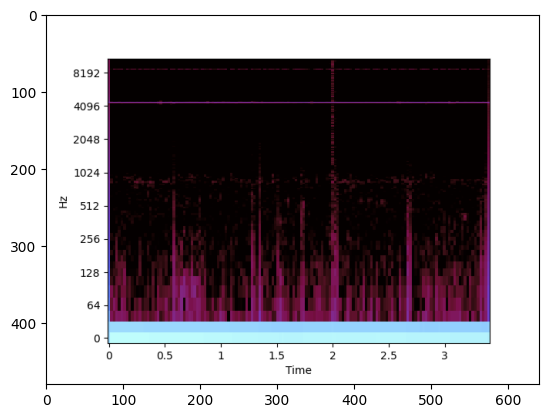

In [11]:
#### check visulization of control and mdd images
######################### Control ####################
import os
import matplotlib.pyplot as plt
import cv2
pathimg='/content/drive/MyDrive/eeg_dataset/dataset_2dimages/Control/02020008_104.png'
img=cv2.imread(pathimg)
print(img.shape)
plt.imshow(img)


(480, 640, 3)


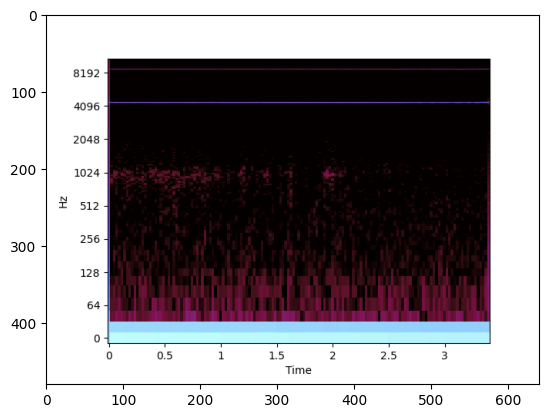

In [12]:
############ MDD ##################
import os
import matplotlib.pyplot as plt
import cv2
pathimg='/content/drive/MyDrive/eeg_dataset/dataset_2dimages/MDD/02010002_104.png'
img=cv2.imread(pathimg)
print(img.shape)
plt.imshow(img)

In [ ]:
############ split data into training/validation

In [16]:
pip install split-folders

In [14]:
### train and test folder
!mkdir train_val_dataset

In [18]:
#### we have 2D dataset and then we need to create dataloader
# first you convert dataset into training and validation
###################### split folders into different fold ############
import splitfolders
input_folder='/content/drive/MyDrive/eeg_dataset/dataset_2dimages' ### have two folder mdd,control
################# save train and val folder path
output='/content/drive/MyDrive/eeg_dataset/train_val_dataset'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output,seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values


Copying files: 1537 files [00:44, 34.71 files/s]


In [ ]:
### two way we can create dataset in pytorch
#### first we can use image folder by default class
#### second we can prepare custom class object for classification dataloader

In [29]:
################### first way to create dataloader in pytorch ######################
#Step 1: Install Required Libraries
#Ensure you have PyTorch and torchvision installed.
#You can install them using pip if you haven't already
# pip install torch torchvision
#Import Libraries

# step2: Import the necessary libraries for handling datasets and creating DataLoaders.
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [30]:
#Step 3: Define Transformations
#Define the transformations to apply to the images. This usually includes resizing, normalization,
#and data augmentation (for training data).

# Define transformations for the training set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size for all images
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

# Define transformations for the validation/test set
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size for all images
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std

])


1228
309
torch.Size([3, 224, 224])
0


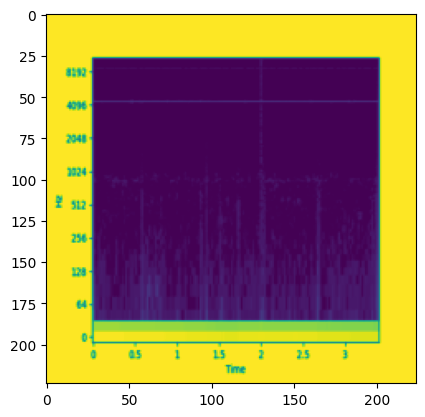

In [36]:
#Step 4: Load the Dataset
#Use ImageFolder from torchvision.datasets to load your dataset.
#This class expects a directory structure where each class has its own folder.
# dataset path
train_dataset_path = '/content/drive/MyDrive/eeg_dataset/train_val_dataset/train'
test_dataset_path = '/content/drive/MyDrive/eeg_dataset/train_val_dataset/val'

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(root=train_dataset_path, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_dataset_path, transform=test_transform)
############# check dataset training and testing len #########
print(len(train_dataset))
print(len(test_dataset))

############# check image and label of sample 0
img,label=train_dataset[0]
print(img.shape)
print(label)
############################ plot image #################
plt.imshow(img[1,:,:])

In [38]:
#Step 5: Create DataLoaders
#Create DataLoaders for your training and validation/test datasets.
#DataLoaders help in batching, shuffling, and loading the data in parallel using multiple workers.
# Define batch size
batch_size = 32

# Create DataLoader for the training set
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Create DataLoader for the validation/test set
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

####### check image and labels in batches ###########

for i,d in enumerate(train_loader):
  img_b,label_b=d
  print(img_b.shape) ###### (batch,channel,H,W)(32,3,224,224)
  print(label_b)   ###### (batch,labels)(32,1)
  break



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1])


In [ ]:
###### second way of dataset and dataloader

In [27]:
### custom dataloader in pytorch
import os
from glob import glob
path='/content/drive/MyDrive/eeg_dataset/train_val_dataset/train'
pathcontrol=glob(os.path.join(path,'Control','*.png'))  # extract pathlist control
print(pathcontrol[0])
pathmdd=glob(os.path.join(path,'MDD','*.png'))   ## read path list mdd
print(pathmdd[0])

#################### create pathlist with label 0 for control class ###########
controlclass=[]  ############ list of tuples of images path and labels for control class
for i in range(0,len(pathcontrol)):
  pathc=pathcontrol[i]
  controlclass.append((pathc,0))
print(len(controlclass)) ### we have 672 samples for control
########################### create pathlist with label 1 for mdd class #######
mddclass=[]  ############### tuple of image paths and labels for mdd class
for i in range(0,len(pathmdd)):
  pathmddc=pathmdd[i]
  mddclass.append((pathmddc,1))
print(len(mddclass))  ############ 556 samples for mdd class


/content/drive/MyDrive/eeg_dataset/train_val_dataset/train/Control/02030014_122.png
/content/drive/MyDrive/eeg_dataset/train_val_dataset/train/MDD/02010034_104.png
672
556


In [28]:
imgpath,label=mddclass[0]  ### this is tuple and we can extract path of image and label for sample 0
print(imgpath)
print(label)

/content/drive/MyDrive/eeg_dataset/train_val_dataset/train/MDD/02010034_104.png
1


torch.Size([3, 224, 224])
0


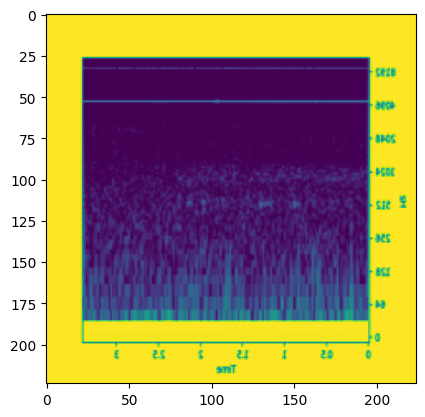

In [54]:
#second way of dataset and dataloader
import torch
from torch.utils.data import Dataset
from PIL import Image

class my_depression(Dataset):
  def __init__(self,datapath,transform=None):
    self.datapath=datapath
    self.transform=transform
    pathcontrol=glob(os.path.join(self.datapath,'Control','*.png'))  # extract pathlist control
    #print(pathcontrol[0])
    pathmdd=glob(os.path.join(self.datapath,'MDD','*.png'))   ## read path list mdd
    #print(pathmdd[0])
    #################### create pathlist with label 0 for control class ###########
    self.controlclass=[]  ############ list of tuples of images path and labels for control class
    for i in range(0,len(pathcontrol)):
      pathc=pathcontrol[i]
      self.controlclass.append((pathc,0))
    #print(len(controlclass)) ### we have 672 samples for control
    ########################### create pathlist with label 1 for mdd class #######
    self.mddclass=[]  ############### tuple of image paths and labels for mdd class
    for i in range(0,len(pathmdd)):
      pathmddc=pathmdd[i]
      self.mddclass.append((pathmddc,1))
    #print(len(mddclass))  ############ 556 samples for mdd class
    self.totaldatalist=self.controlclass+self.mddclass

  def __getitem__(self, index):
    impath,label=self.totaldatalist[index]
    # Open an image file
    image = Image.open(impath) ### open image in PIL
    #print("Image size:", image.size)
    #print("Image mode:", image.mode)
    image = image.convert('RGB') ##### convert image into rgb mode
    ############ tranform image ###################
    if self.transform is not None:
      image=self.transform(image)
    image=image

    return image,label

  def __len__(self):
    return len(self.totaldatalist)
datapath='/content/drive/MyDrive/eeg_dataset/train_val_dataset/train'
# Define transformations for the training set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size for all images
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

# Define transformations for the validation/test set
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size for all images
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std

])


train_dataset=my_depression(datapath,transform=train_transform)
img,label=train_dataset[0]
print(img.shape)
print(label)
plt.imshow(img[0,:,:])
datapathval='/content/drive/MyDrive/eeg_dataset/train_val_dataset/val'
test_dataset=my_depression(datapathval,transform=test_transform)


In [55]:
# Create DataLoader for the training set
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Create DataLoader for the validation/test set
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

####### check image and labels in batches ###########

for i,d in enumerate(train_loader):
  img_b,label_b=d
  print(img_b.shape) ###### (batch,channel,H,W)(32,3,224,224)
  print(label_b)   ###### (batch,labels)(32,1)
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 3, 224, 224])
tensor([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1])
